In [60]:
from binn import Network, BINN
import pandas as pd

input_data = pd.read_csv("../data/test_qm.csv")
translation = pd.read_csv("../data/translation.tsv", sep="\t")
pathways = pd.read_csv("../data/pathways.tsv", sep="\t")

network = Network(
    input_data=input_data,
    pathways=pathways,
    mapping=translation,
    source_column="child",
    target_column="parent",
)

                
binn = BINN(
    network=network,
    n_layers=4,
    dropout=0.2,
    validate=False,
    residual=False,
    device="cpu",
)



BINN is on the device: cpu


In [57]:
from util_for_examples import fit_data_matrix_to_network_input, generate_data
import torch

design_matrix = pd.read_csv("../data/design_matrix.tsv", sep="\t")

protein_matrix = fit_data_matrix_to_network_input(input_data, features=network.inputs)

X, y = generate_data(protein_matrix, design_matrix=design_matrix)
dataset = torch.utils.data.TensorDataset(
    torch.tensor(X, dtype=torch.float32, device=binn.device),
    torch.tensor(y, dtype=torch.int16, device=binn.device),
)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)

In [61]:
from binn.explainer import BINNExplainer

explainer = BINNExplainer(binn)


In [62]:
test_data = torch.Tensor(X)
background_data = torch.Tensor(X)

n_iterations = 10
n_epochs = 30

importance_df = explainer.explain_average(test_data, background_data, n_iterations, n_epochs, dataloader, fast_train=True)
importance_df.head()

Epoch 0, Average Accuracy 0.6340000033378601, Average Loss: 0.682458325624466
Epoch 1, Average Accuracy 0.7139999866485596, Average Loss: 0.5777261072397232
Epoch 2, Average Accuracy 0.7419999837875366, Average Loss: 0.5113813090324402
Epoch 3, Average Accuracy 0.8169999718666077, Average Loss: 0.43281247675418855
Epoch 4, Average Accuracy 0.8149999976158142, Average Loss: 0.4526327085494995
Epoch 5, Average Accuracy 0.8690000176429749, Average Loss: 0.3414280146360397
Epoch 6, Average Accuracy 0.8199999928474426, Average Loss: 0.3939264887571335
Epoch 7, Average Accuracy 0.8289999961853027, Average Loss: 0.352226440012455
Epoch 8, Average Accuracy 0.9100000262260437, Average Loss: 0.26868525192141535
Epoch 9, Average Accuracy 0.8769999742507935, Average Loss: 0.28620196402072906
Epoch 10, Average Accuracy 0.8790000081062317, Average Loss: 0.28847096383571624
Epoch 11, Average Accuracy 0.9100000262260437, Average Loss: 0.2349762140214443
Epoch 12, Average Accuracy 0.906999945640564, Av

,source,target,source name,target name,type,source layer,target layer,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_mean,values_std,value
0,1,497,A0M8Q6,R-HSA-166663,0,0,1,0.014441,0.051708,0.063063,0.069656,0.023602,0.069102,0.101831,0.046430,0.052635,0.005264,0.049773,0.027555,0.049773
1,1,497,A0M8Q6,R-HSA-166663,1,0,1,0.026918,0.030565,0.030945,0.121813,0.128556,0.053597,0.080961,0.010082,0.047122,0.050223,0.058078,0.038108,0.058078
2,1,954,A0M8Q6,R-HSA-198933,0,0,1,0.014441,0.051708,0.063063,0.069656,0.023602,0.069102,0.101831,0.046430,0.052635,0.005264,0.049773,0.027555,0.049773
3,1,954,A0M8Q6,R-HSA-198933,1,0,1,0.026918,0.030565,0.030945,0.121813,0.128556,0.053597,0.080961,0.010082,0.047122,0.050223,0.058078,0.038108,0.058078
4,1,539,A0M8Q6,R-HSA-2029481,0,0,1,0.014441,0.051708,0.063063,0.069656,0.023602,0.069102,0.101831,0.046430,0.052635,0.005264,0.049773,0.027555,0.049773


In [63]:
importance_df["copy"] = importance_df.apply(lambda x: True if x["source name"] == x["target name"] else False, axis=1)
importance_df = importance_df[importance_df["copy"] == False]
importance_df

,source,target,source name,target name,type,source layer,target layer,value_0,value_1,value_2,...,value_4,value_5,value_6,value_7,value_8,value_9,value_mean,values_std,value,copy
0,1,497,A0M8Q6,R-HSA-166663,0,0,1,0.014441,0.051708,0.063063,...,0.023602,0.069102,0.101831,0.046430,0.052635,0.005264,0.049773,0.027555,0.049773,False
1,1,497,A0M8Q6,R-HSA-166663,1,0,1,0.026918,0.030565,0.030945,...,0.128556,0.053597,0.080961,0.010082,0.047122,0.050223,0.058078,0.038108,0.058078,False
2,1,954,A0M8Q6,R-HSA-198933,0,0,1,0.014441,0.051708,0.063063,...,0.023602,0.069102,0.101831,0.046430,0.052635,0.005264,0.049773,0.027555,0.049773,False
3,1,954,A0M8Q6,R-HSA-198933,1,0,1,0.026918,0.030565,0.030945,...,0.128556,0.053597,0.080961,0.010082,0.047122,0.050223,0.058078,0.038108,0.058078,False
4,1,539,A0M8Q6,R-HSA-2029481,0,0,1,0.014441,0.051708,0.063063,...,0.023602,0.069102,0.101831,0.046430,0.052635,0.005264,0.049773,0.027555,0.049773,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,1319,0,R-HSA-9612973,root,1,4,5,0.209004,0.346929,0.204035,...,0.182652,0.259200,0.203038,0.084697,0.044891,0.188447,0.182068,0.083797,0.182068,False
6902,1320,0,R-HSA-9709957,root,0,4,5,0.190490,0.199260,0.016510,...,0.140438,0.126497,0.161002,0.029624,0.047739,0.269140,0.132862,0.076720,0.132862,False
6903,1320,0,R-HSA-9709957,root,1,4,5,0.255980,0.020262,0.407827,...,0.382158,0.172449,0.222164,0.352733,0.264544,0.261558,0.266883,0.107840,0.266883,False
6904,1321,0,R-HSA-9748784,root,0,4,5,0.074787,0.134037,0.180822,...,0.191465,0.226075,0.126530,0.006684,0.005491,0.136311,0.117088,0.070326,0.117088,False


In [64]:
importance_df = importance_df.groupby(["source name", "source layer", "target layer"], as_index=False).mean(numeric_only=True)
mean_ranks = []
std_ranks = []
source_layer = []
sources = []
for layer in range(binn.n_layers):
    layer_df = importance_df[importance_df["source layer"] == layer].copy()
    for i in range(n_iterations):
        layer_df.sort_values(f"value_{i}", ascending=False, inplace=True)
        layer_df[f"rank_{i}"] = range(len(layer_df.index))
    rank_cols = [c for c in layer_df.columns if c.startswith("rank")]
    mean_ranks += (layer_df[rank_cols].mean(axis=1)/ len(layer_df.index)).tolist()
    sources += layer_df["source name"].tolist()
    std_ranks  += (layer_df[rank_cols].std(axis=1)/ len(layer_df.index)).tolist()
    source_layer += layer_df["source layer"].tolist()
plot_df = pd.DataFrame({"mean":mean_ranks, "std":std_ranks, "source layer":source_layer, "source":sources})

In [65]:
plot_df.sort_values("mean").head(20)

,mean,std,source layer,source
2,0.002895,0.003490,0,P04114
0,0.004900,0.005536,0,P60709
452,0.009121,0.006658,1,R-HSA-5696394
3,0.009131,0.013174,0,P02647
470,0.009772,0.021054,1,R-HSA-975634
459,0.014332,0.010092,1,R-HSA-140534
45,0.020490,0.028343,0,P08571
768,0.022008,0.015124,2,R-HSA-5696399
759,0.022394,0.022791,2,R-HSA-975634
17,0.022717,0.018863,0,P04908


<Axes: xlabel='std', ylabel='mean'>

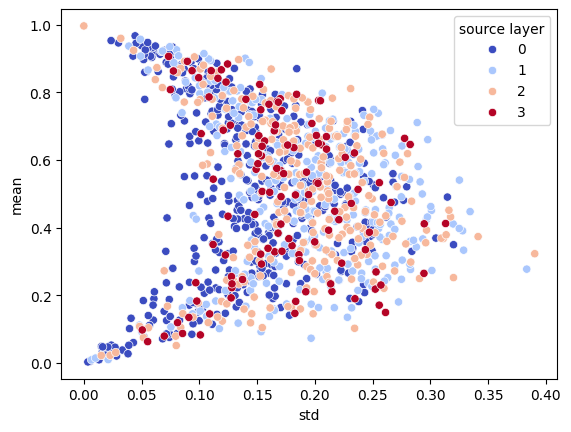

In [66]:
import seaborn as sns


sns.scatterplot(plot_df, y="mean", x="std", hue="source layer", palette="coolwarm")

